In [1]:
import numpy as np

In [55]:
# 1. You have an array of random numbers. 
# You need to flip the sign of the elements whose values are between 3 and 8 (inclusive).

# create a random array of 10 integers from -10 to 10
arr = np.random.randint(-10, 11, size=10)
print("Original array:", arr)

# flip the sign of elements between 3 and 8 inclusive
arr[(arr >= 3) & (arr <= 8)] *= -1

print("Modified array:", arr)

Original array: [-8 -8 10 10  8  0  8 -1 -4 -9]
Modified array: [-8 -8 10 10 -8  0 -8 -1 -4 -9]


In [58]:
# 2. Take a random array and replace its maximum element with 0.

# find the index of the maximum element
max_index = np.argmax(arr)

# replace it with 0
arr[max_index] = 0

print("Modified array:", arr)

Modified array: [-8 -8  0  0 -8  0 -8 -1 -4 -9]


In [59]:
# 3. Construct the Cartesian product of arrays (all combinations taking one element from each array). 
# The input is a two-dimensional array.


def cartesian_product_numpy(arrays):
    if isinstance(arrays, np.ndarray) and arrays.ndim == 2:
        arrays = [arrays[i] for i in range(arrays.shape[0])]
    arrays = [np.asarray(a) for a in arrays]

    if any(a.size == 0 for a in arrays):
        return np.empty((0, len(arrays)))

    grids = np.meshgrid(*arrays, indexing='ij')   # список массивов форм разных размеров
    stacked = np.stack(grids, axis=-1)           # shape = (..., k)
    return stacked.reshape(-1, len(arrays))

arrays = [
    [1, 5],
    [10, 30, 50],
    [100, 400]
]

print(cartesian_product_numpy(arrays))

[[  1  10 100]
 [  1  10 400]
 [  1  30 100]
 [  1  30 400]
 [  1  50 100]
 [  1  50 400]
 [  5  10 100]
 [  5  10 400]
 [  5  30 100]
 [  5  30 400]
 [  5  50 100]
 [  5  50 400]]


In [60]:
# 4. Given array A (8×3) and array B (2×2), find rows in A that contain all elements of at least one row from B, regardless of order.

import numpy as np

A = np.array([
    [1, 7, 3],
    [4, 5, 6],
    [2, 3, 4],
    [7, 4, 9],
    [3, 1, 2],
    [5, 6, 4],
    [9, 7, 8],
    [2, 4, 3]
])

B = np.array([
    [1, 3],
    [4, 8]
])

# Compare: for each row in A and each row in B, check membership
mask = (A[:, None, None, :] == B[None, :, :, None])

# mask shape = (8, 2, 2, 3) → whether each element of B is in row of A
contains = mask.any(-1).all(-1)

# Pick rows of A that match at least one row in B
rows_selected = A[contains.any(1)]

print(rows_selected)


[[1 7 3]
 [3 1 2]]


In [61]:
# 5. Given a 10×3 matrix, find the rows with unequal values (for example, the row [2, 2, 3] is kept, while the row [3, 3, 3] is removed).

import numpy as np

# Example 10x3 matrix
A = np.array([
    [2, 1, 3],
    [3, 5, 3],
    [1, 2, 1],
    [4, 4, 4],
    [5, 6, 5],
    [7, 7, 7],
    [8, 9, 8],
    [10, 10, 10],
    [11, 12, 11],
    [13, 13, 13]
])

# Check which rows do NOT have all elements equal
mask = ~(A == A[:, [0]]).all(axis=1)

# Select those rows
result = A[mask]

print(result)


[[ 2  1  3]
 [ 3  5  3]
 [ 1  2  1]
 [ 5  6  5]
 [ 8  9  8]
 [11 12 11]]


In [63]:
# 6. Given a 2D array, remove the rows that are repeated.

import numpy as np

# Example array
A = np.array([
    [1, 2, 3],
    [6, 6, 6],
    [1, 2, 3],
    [7, 8, 9],
    [4, 5, 6]
])

# Use np.unique with axis=0 to remove duplicate rows
result = np.unique(A, axis=0)

print(result)

[[1 2 3]
 [4 5 6]
 [6 6 6]
 [7 8 9]]


In [64]:
# Tasks 1-5

# Task 1. Product of nonzero elements on the diagonal of a rectangular matrix

# Python
X = [
    [1, 0, 1],
    [2, 0, 2],
    [3, 0, 3],
    [4, 4, 4]
]

diag = [X[i][i] for i in range(min(len(X), len(X[0])))]
prod = 1
for x in diag:
    if x != 0:
        prod *= x
print(prod)  

# NumPy
import numpy as np
X = np.array([[1, 0, 1],
              [2, 0, 2],
              [3, 0, 3],
              [4, 4, 4]])

diag = np.diag(X)
prod = diag[diag != 0].prod()
print(prod)

3
3


In [65]:
# Task 2. Check if two vectors represent the same multiset

# Python
x = [1, 2, 2, 4]
y = [4, 2, 1, 2]

from collections import Counter
print(Counter(x) == Counter(y))

# NumPy
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

print(np.array_equal(np.sort(x), np.sort(y)))

True
True


In [66]:
# Task 3. Maximum element in a vector that precedes a zero

# Python
x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
candidates = [x[i] for i in range(1, len(x)) if x[i-1] == 0]
print(max(candidates))

# NumPy
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
candidates = x[1:][x[:-1] == 0]
print(candidates.max())

5
5


In [67]:
# Task 4. Run-length encoding (RLE)

# Python
x = [2, 2, 2, 3, 3, 3, 5]

values, counts = [], []
current = x[0]
cnt = 1
for e in x[1:]:
    if e == current:
        cnt += 1
    else:
        values.append(current)
        counts.append(cnt)
        current = e
        cnt = 1
values.append(current)
counts.append(cnt)

print(values, counts)  

# NumPy
x = np.array([2, 2, 2, 3, 3, 3, 5])
mask = np.r_[True, x[1:] != x[:-1]]
values = x[mask]
counts = np.diff(np.r_[np.where(mask)[0], len(x)])
print(values, counts)


[2, 3, 5] [3, 3, 1]
[2 3 5] [3 3 1]


In [8]:
# 5. Euclidean distance matrix between two sets of objects

# Python
X = [[0,0],[1,0]]
Y = [[1,1],[2,0]]

import math
start = time.time()
dist_matrix = [[math.sqrt(sum((xi-yi)**2 for xi, yi in zip(x, y))) for y in Y] for x in X]
print(dist_matrix)
end = time.time()
print("Python execution time:", end-start, "seconds")

# NumPy
X = np.array([[0,0],[1,0]])
Y = np.array([[1,1],[2,0]])
start = time.time()
dist_matrix = np.sqrt(((X[:, None, :] - Y[None, :, :])**2).sum(axis=2))
print(dist_matrix)
end = time.time()
print("NumPy execution time:", end-start, "seconds")

# Comparison with scipy.spatial.distance.cdist
from scipy.spatial.distance import cdist
start = time.time()
dist_matrix = cdist(X, Y, metric='euclidean')
print(dist_matrix)
end = time.time()
print("SciPy cdist execution time:", end-start, "seconds")

max_diff_py_np = np.max(np.abs(np.array(dist_matrix_py) - dist_matrix_np))
max_diff_py_scipy = np.max(np.abs(np.array(dist_matrix_py) - dist_matrix_scipy))
max_diff_np_scipy = np.max(np.abs(dist_matrix_np - dist_matrix_scipy))


print("Max difference Python vs NumPy:", max_diff_py_np)
print("Max difference Python vs SciPy:", max_diff_py_scipy)
print("Max difference NumPy vs SciPy:", max_diff_np_scipy)

[[1.4142135623730951, 2.0], [1.0, 1.0]]
Python execution time: 0.0006520748138427734 seconds
[[1.41421356 2.        ]
 [1.         1.        ]]
NumPy execution time: 0.0005509853363037109 seconds
[[1.41421356 2.        ]
 [1.         1.        ]]
SciPy cdist execution time: 0.00034999847412109375 seconds
Max difference Python vs NumPy: 0.0
Max difference Python vs SciPy: 0.0
Max difference NumPy vs SciPy: 0.0


In [10]:
# Task СrunchieMunchies
# Task 1. 
import numpy as np
calorie_stats = np.loadtxt("/cereal.csv", delimiter=",", skiprows=0)
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

In [41]:
# Task 2. Average calories of competitors
average_calories = np.mean(calorie_stats)
print("Average calories of competitors:", average_calories)
print("Difference from CrunchieMunchies (60 cal):", average_calories - 60)


Average calories of competitors: 106.88311688311688
Difference from CrunchieMunchies (60 cal): 46.883116883116884


In [42]:
# Task 3. Sort the data
calorie_stats_sorted = np.sort(calorie_stats)
print("Sorted calorie stats:", calorie_stats_sorted)

Sorted calorie stats: [ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


In [43]:
# Task 4. Median
median_calories = np.median(calorie_stats)
print("Median calories:", median_calories)

Median calories: 110.0


In [50]:
# Task 5. Find the lowest percentile exceeding 60 calories
percentiles = np.arange(101)  # 0 to 100
values_at_percentiles = np.percentile(calorie_stats, percentiles)
nth_percentile = percentiles[values_at_percentiles > 60][0]  # first percentile above 60

print("Lowest percentile exceeding 60 calories:", nth_percentile)

Lowest percentile exceeding 60 calories: 4


In [45]:
# Task 6. Percentage of cereals with more than 60 calories
more_calories = np.sum(calorie_stats > 60) / calorie_stats.size * 100
print("Percentage of cereals > 60 calories:", more_calories)

Percentage of cereals > 60 calories: 96.1038961038961


In [46]:
# Task 7. Standard deviation
calorie_std = np.std(calorie_stats)
print("Standard deviation:", calorie_std)

Standard deviation: 19.35718533390827


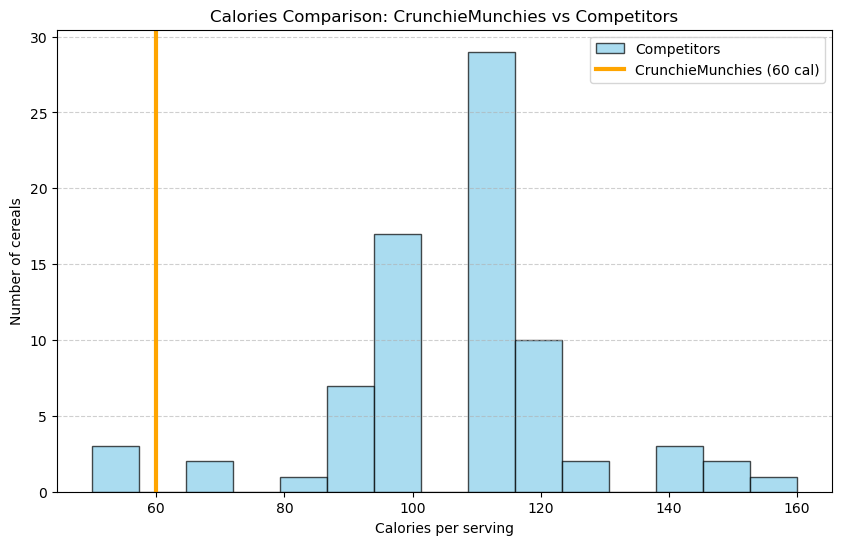

In [48]:
# Task 8. 
# The analysis demonstrates that competitors’ cereals have a substantially higher average calorie content compared to CrunchieMunchies (60 calories per serving).
# With the median exceeding 100 calories, the majority of products on the market are considerably more calorie-dense.
# Percentile and proportion analyses confirm that most competitors surpass the 60-calorie mark, 
# while the standard deviation indicates some variability, yet even lower-calorie options rarely reach the level of CrunchieMunchies.
# These insights underscore that CrunchieMunchies is a lighter, healthier alternative, a clear differentiator 
# that can be leveraged in marketing campaigns to appeal to health-conscious consumers seeking a nutritious breakfast option.

# Visualization
import matplotlib.pyplot as plt

# CrunchieMunchies calories
crunchie_munchies_cal = 60

# Plot histogram of competitors
plt.figure(figsize=(10,6))
plt.hist(calorie_stats, bins=15, color='skyblue', edgecolor='black', alpha=0.7, label='Competitors')

# Add CrunchieMunchies as a vertical line
plt.axvline(crunchie_munchies_cal, color='orange', linewidth=3, label='CrunchieMunchies (60 cal)')

# Labels and title
plt.xlabel('Calories per serving')
plt.ylabel('Number of cereals')
plt.title('Calories Comparison: CrunchieMunchies vs Competitors')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
